In [1]:
from astropy.io import fits 
import matplotlib.pyplot as plt
import astropy 
import numpy as np 
from flow import flowLCT
%matplotlib inline

<class 'numpy.ndarray'>


(20, 275, 274)

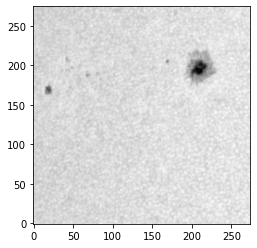

In [4]:
cube = fits.getdata('/Volumes/VALERIA/AUSUS/Documents/MOAT/Cubos/cubealign.fits')
#cube = fits.getdata('/Volumes/VALERIA/AUSUS/Documents/MOAT/Cubos/cubo_filtered.fits')
#cube_filtered = ('/home/oan1803/Documents/MOAT/Cubos/cubo_filtered.fits')


plt.imshow(cube[19,:,:], cmap='gray', origin ='lower')
#plt.imshow(cube[10,0:128,145:274], cmap='gray')
#plt.imshow(cube[19,135:264,146:274], cmap='gray')
print(type(cube))
cube.shape

(275, 274)
56066.0956807602


(array([193]), array([186]))

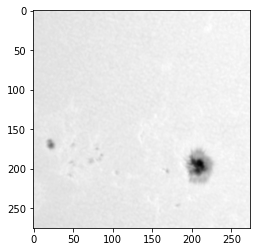

In [3]:
Promedio_cube = np.mean(cube[:20],axis=0)
print(Promedio_cube.shape)

plt.imshow(Promedio_cube, cmap='gray')

Promedio_cube

minn=np.max(Promedio_cube)

print(minn)

np.where(Promedio_cube==minn)



#### Cuando el cubo está completo de 838 imagenes

In [39]:
vx = []
vy = []
vz = []
for i in range(30,838,30):
    velcube = flowLCT(cube[i-30:i], 3, 0.504, 720)
    vx.append(velcube.vx)
    vy.append(velcube.vy)
    vz.append(velcube.vz)
    #Para i=0 se tiene el intervalo de 0-30 y así sucesivamente. Hay un total de 27 intervalos de 0 a 838 imágenes.
#print(vx[1])
print(len(vx))
#print(vx)

27


#### Cuando el cubo está por secciónes de 20 imágenes (Cube_align)

In [20]:
velcubealign = flowLCT(cube[0:20], 3, 0.504, 720)
#velcube30 = flowLCT(cube[15:30], 2, 0.504, 720)
#velcube45 = flowLCT(cube[30:45], 2, 0.504, 720)
#velcube60 = flowLCT(cube[45:60], 2, 0.504, 720)
#velcube75 = flowLCT(cube[60:75], 2, 0.504, 720)


vx = velcubealign.vx
vy = velcubealign.vy
vz = velcubealign.vz

print(np.min(vx))
print(np.mean(vx))
print(np.max(vx))
#print(vx)

-1.4480571713664008
-1.273036089284851e-18
0.6352310977711471


In [21]:
#Se crean las matrices para generar la red en la que se van a dibujar las flechas

x = np.arange(0,274)
y = np.arange(0,275)

ejex=x*0.504
ejey=y*0.504

X, Y = np.meshgrid(ejex, ejey)  #Matrices X y Y que van de 0 a 277 en sus filas y columnas
u = vx
v = vy
#u = vx[0]  #Matrices que van a definir la dirección de la flecha, vx[0] son las vels de 0-30
#v = vy[0]

print(np.min(u))
print(np.max(v))

-1.4480571713664008
1.5246739261367146


0.6352310977711471
1.5246739261367146
1.5480437093636419
0.1486740307431365


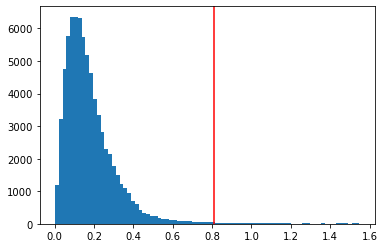

In [22]:
magnitud = np.sqrt((u)**2 + (v)**2)
M=np.max(magnitud)

np.std(u)
np.mean(v)
np.std(v)

print(np.max(u))
print(np.max(v))
print(np.max(M))

print(np.std(u))

n, b, _ = plt.hist(np.ravel(magnitud), bins=80)
plt.axvline(0.81, color='r')

In [23]:
#uu = np.clip(u,-0.77,0.77)
#vv = np.clip(v,-0.77,0.77)
#print(np.max(vv))

#Máscara para eliminar velocidades fuera de rango Ya no lo usaremos porque necesitamos las superiores

#u[magnitud>0.81]=np.nan
#v[magnitud>0.81]=np.nan

#print(u)

[[        nan         nan -0.50845666 ...  0.0040685   0.05336058
   0.07723188]
 [        nan         nan -0.5379717  ...  0.03162715  0.08016398
   0.10340235]
 [        nan -0.75853085 -0.55288783 ...  0.08522476  0.13151595
   0.15314681]
 ...
 [-0.41159242 -0.36665622 -0.29653671 ...  0.02481474 -0.01896077
  -0.05469968]
 [-0.41243543 -0.36497961 -0.29015409 ... -0.00812574 -0.063577
  -0.11203315]
 [-0.41032059 -0.3618777  -0.28494751 ... -0.02368276 -0.08496791
  -0.14007072]]


In [24]:
X[80:274,80:275].min()

40.32

In [25]:
#Máscara para quitar flechas dentro de la mancha

X[Promedio_cube<50000]=np.nan
Y[Promedio_cube<50000]=np.nan

np.where(Promedio_cube<25000)
#np.min(Promedio_cube)

(array([189, 189, 189, 189, 189, 190, 190, 190, 190, 190, 190, 190, 190,
        190, 190, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191,
        191, 191, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192,
        192, 192, 192, 193, 193, 193, 193, 193, 193, 193, 193, 193, 193,
        193, 193, 193, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194,
        194, 194, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195,
        196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 196, 197,
        197, 197, 197, 197, 197, 197, 197, 197, 197, 197, 198, 198, 198,
        198, 198, 198, 198, 198, 198, 198, 199, 199, 199, 199, 199, 199,
        199, 199, 199, 200, 200, 200, 200, 200, 200, 200, 200, 200, 201,
        201, 201, 201, 201, 201, 201, 202, 202, 202, 202, 202, 202, 203,
        203, 203, 203, 203, 204, 204, 204]),
 array([202, 208, 209, 210, 211, 201, 202, 203, 204, 207, 208, 209, 210,
        211, 212, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
      

In [26]:
#u.shape
Promedio_cube.shape

(275, 274)

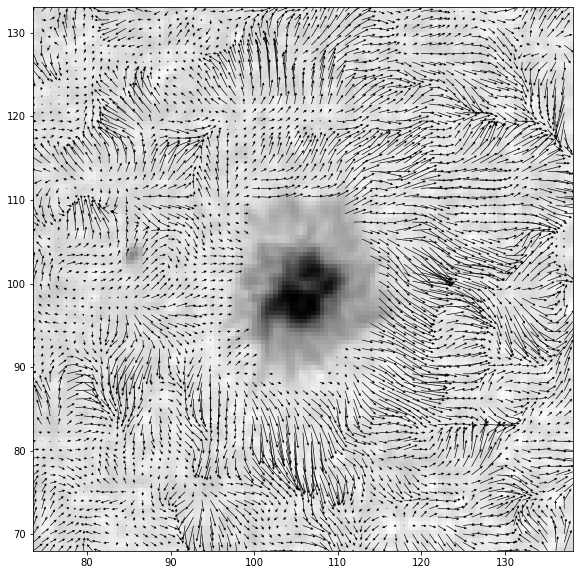

In [23]:
# Se hace la red de flechas de las velocidades 


fig, ax = plt.subplots(figsize=(10,10))

Q= ax.quiver(X[135:264,146:274][::2,::2],Y[135:264,146:274][::2,::2],u[135:264,146:274][::2,::2],v[135:264,146:274][::2,::2], color='black', alpha=2, scale=8, headwidth= 4, headlength=4, width=0.0012)
plt.imshow(cube[19,135:264,146:274],cmap='gray',origin='lower', extent=(146*0.504,274*0.504,135*0.504,264*0.504))

plt.savefig('GeneralVelocity.pdf')

# Para cube_filtered

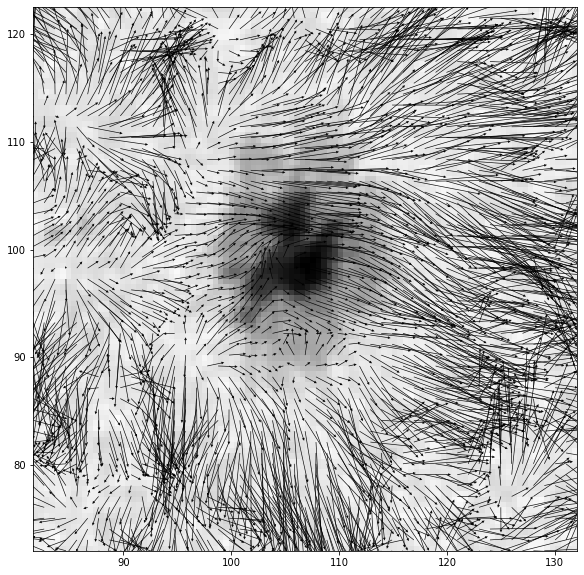

In [11]:
# Se hace la red de flechas de las velocidades 


fig, ax = plt.subplots(figsize=(10,10))

Q= ax.quiver(X[143:243,162:262][::2,::2],Y[143:243,162:262][::2,::2],u[143:243,162:262][::2,::2],v[143:243,162:262][::2,::2], color='black', alpha=10, scale=2, headwidth= 4, headlength=4, width=0.0012)
plt.imshow(cube[7,143:243,162:262],cmap='gray',origin='lower', extent=(162*0.504,262*0.504,143*0.504,243*0.504))

AttributeError: 'Quiver' object has no attribute 'shape'

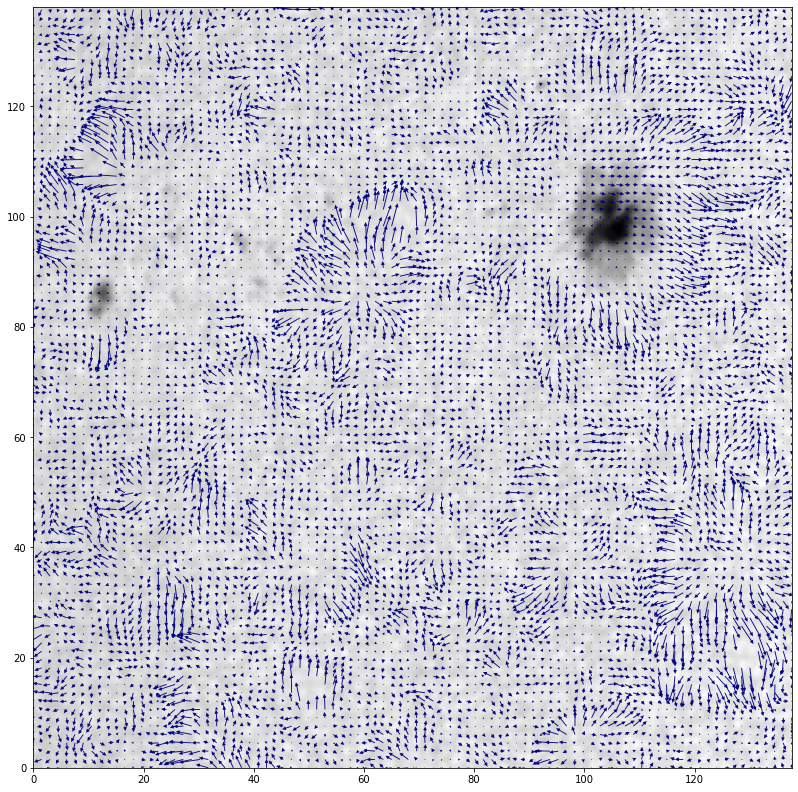

In [13]:
# Se hace la red de flechas de las velocidades 

#color = np.sqrt((u)**2 + (v)**2)

fig, ax = plt.subplots(figsize=(14,14))

Q= ax.quiver(X[::3,::3],Y[::3,::3],u[::3,::3],v[::3,::3], color='navy', alpha=10, scale=25, headwidth= 4, headlength=4, width=0.0012)
plt.imshow(cube[7],cmap='gray',origin='lower',extent=(X.min(),X.max(),Y.min(),Y.max()))

print(Q.shape)
#SOLO SIRVE SIN LA MASCARA DE INTENSIDAD

# ------------ INTENTO DE VELOCIDADES POR SECCIÓN ----------------------

<class 'numpy.ndarray'>


(20, 129, 128)

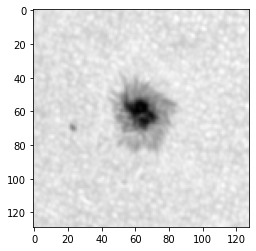

In [4]:
cubesection = cube[:,135:264,146:274]
#cube = fits.getdata('/Volumes/VALERIA/AUSUS/Documents/MOAT/Cubos/cubo_filtered.fits')
#cube_filtered = ('/home/oan1803/Documents/MOAT/Cubos/cubo_filtered.fits')


#plt.imshow(cube[19,:,:], cmap='gray')
plt.imshow(cubesection[19,:,:], cmap='gray')
print(type(cube))
cubesection.shape

(129, 128)
56108.82387357613


(array([58]), array([40]))

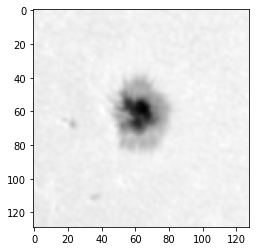

In [5]:
Promedio_cubesection = np.mean(cubesection[:19],axis=0)
print(Promedio_cubesection.shape)

plt.imshow(Promedio_cubesection, cmap='gray')

Promedio_cubesection

minn=np.max(Promedio_cubesection)

print(minn)

np.where(Promedio_cubesection==minn)


In [6]:
velcubesection = flowLCT(cubesection[0:20], 3, 0.504, 720)
#velcube30 = flowLCT(cube[15:30], 2, 0.504, 720)
#velcube45 = flowLCT(cube[30:45], 2, 0.504, 720)
#velcube60 = flowLCT(cube[45:60], 2, 0.504, 720)
#velcube75 = flowLCT(cube[60:75], 2, 0.504, 720)


vx = velcubesection.vx
vy = velcubesection.vy
vz = velcubesection.vz

print(np.min(vx))
print(np.mean(vx))
print(np.max(vx))
#print(vx)

-0.6424932887769464
4.3031900179269633e-19
0.5440479730246277


In [7]:
#Se crean las matrices para generar la red en la que se van a dibujar las flechas

x = np.arange(0,128)
y = np.arange(0,129)

ejex=x*0.504
ejey=y*0.504

X, Y = np.meshgrid(ejex, ejey)  #Matrices X y Y que van de 0 a 274 y de 0 a 275 en sus filas y columnas

u = vx  #Matrices que van a definir la dirección de la flecha, vx[0] son las vels de 0-30
v = vy

print(np.min(u))
print(np.max(v))

-0.6424932887769464
0.624988308706726


0.915722079548824
0.14650381055350498
0.09664246817836919


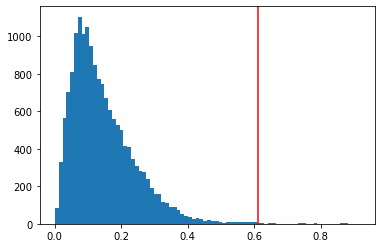

In [8]:
magnitud = np.sqrt((u)**2 + (v)**2)


np.std(u)
np.mean(v)
np.std(v)

#print(np.max(u))
#print(np.max(v))
print(np.max(magnitud))
print(np.mean(magnitud))
print(np.std(magnitud))

n, b, _ = plt.hist(np.ravel(magnitud), bins=80)
plt.axvline(0.61, color='r')

In [8]:
#Máscara para eliminar velocidades fuera de rango

#u[magnitud>0.61]=np.nan
#v[magnitud>0.61]=np.nan

#print(u)

In [9]:
#Mascara para eliminar velocidades dentro de la mancha 

u[Promedio_cubesection<50000]=np.nan
v[Promedio_cubesection<50000]=np.nan

In [15]:
X.shape

(139, 138)

In [83]:
#Máscara para quitar flechas dentro de la mancha (MASCARA INTENSIDAD)

X[Promedio_cubesection<50000]=np.nan
Y[Promedio_cubesection<50000]=np.nan

np.where(Promedio_cubesection<25000)
#np.min(Promedio_cube)

(array([54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56,
        56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57,
        57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58,
        58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60,
        60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61,
        61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63,
        63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66,
        67, 67, 67, 67, 67, 67, 68, 68, 68, 68, 68, 69, 69, 69]),
 array([56, 62, 63, 64, 65, 55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 55, 56,
        57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 56, 57, 58, 59, 60, 61, 62, 63, 64,
        65, 66, 67, 68, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 58,
        59, 60, 61, 62

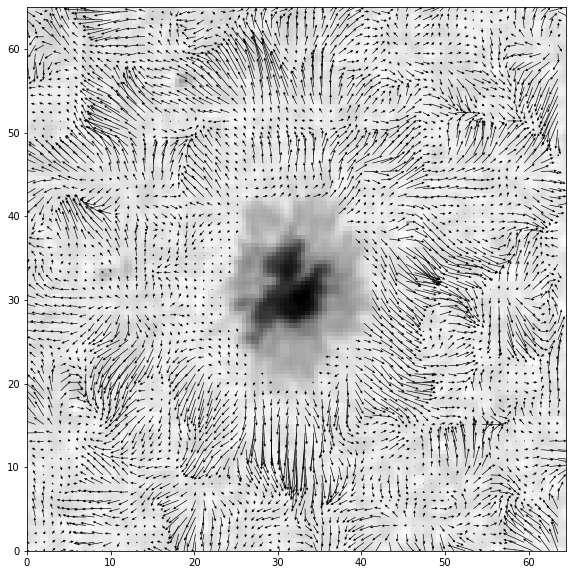

In [11]:
# Se hace la red de flechas de las velocidades 

#color = np.sqrt((u)**2 + (v)**2)

fig, ax = plt.subplots(figsize=(10,10))

Q= ax.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2], color='black', alpha=1, scale=8, headwidth= 4, headlength=4, width=0.0012)
plt.imshow(cubesection[7],cmap='gray',origin='lower',extent=(0*0.504,128*0.504,0*0.504,129*0.504))

#plt.savefig('SectionVelocity.pdf')
#SOLO SIRVE SIN LA MASCARA DE INTENSIDAD O CON LA MASCARA DE VELOCIDADES INTERNAS

0.915722079548824
0.15203461802693435
0.09770665076587143


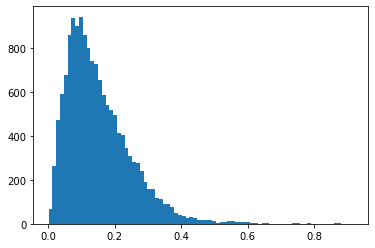

In [12]:
magnitud2 = np.sqrt((u)**2 + (v)**2)


np.std(u)
np.mean(v)
np.std(v)

#print(np.max(u))
#print(np.max(v))
print(np.nanmax(magnitud2))
print(np.nanmean(magnitud2))
print(np.nanstd(magnitud2))

n, b, _ = plt.hist(np.ravel(magnitud2), bins=80)
#plt.axvline(0.61, color='r')

## Velocidades en Quiet Zone

<class 'numpy.ndarray'>


(20, 168, 169)

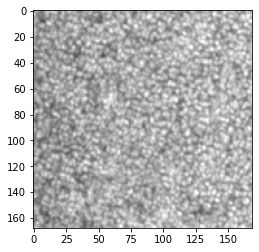

In [25]:
#cubequietsection = cube[:,0:128,145:274]
cubequietsection = cube[:,0:168,105:274]
#cube = fits.getdata('/Volumes/VALERIA/AUSUS/Documents/MOAT/Cubos/cubo_filtered.fits')
#cube_filtered = ('/home/oan1803/Documents/MOAT/Cubos/cubo_filtered.fits')


#plt.imshow(cube[19,:,:], cmap='gray')
plt.imshow(cubequietsection[19,:,:], cmap='gray', vmin=45000, vmax=58000)
print(type(cubequietsection))
cubequietsection.shape

(168, 169)
56048.46570223444


(array([24]), array([116]))

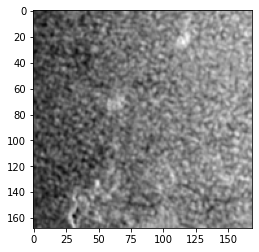

In [26]:
Promedio_cubequietsection = np.mean(cubequietsection[:19],axis=0)
print(Promedio_cubequietsection.shape)

plt.imshow(Promedio_cubequietsection, cmap='gray')

Promedio_cubequietsection

minn=np.max(Promedio_cubequietsection)

print(minn)

np.where(Promedio_cubequietsection==minn)

In [28]:
velcubesection = flowLCT(cubequietsection[0:20], 3, 0.504, 720)
#velcube30 = flowLCT(cube[15:30], 2, 0.504, 720)
#velcube45 = flowLCT(cube[30:45], 2, 0.504, 720)
#velcube60 = flowLCT(cube[45:60], 2, 0.504, 720)
#velcube75 = flowLCT(cube[60:75], 2, 0.504, 720)


vx = velcubesection.vx
vy = velcubesection.vy
vz = velcubesection.vz

print(np.min(vx))
print(np.mean(vx))
print(np.std(vx))
print(np.mean(vy))
print(np.std(vy))
#print(vx)

-0.9046004166514907
1.0010464014653426e-18
0.13571820023713493
0.0
0.1917888752544417


In [51]:
#Se crean las matrices para generar la red en la que se van a dibujar las flechas

x = np.arange(0,128)
y = np.arange(0,129)

ejex=x*0.504
ejey=y*0.504

X, Y = np.meshgrid(ejex, ejey)  #Matrices X y Y que van de 0 a 274 y de 0 a 275 en sus filas y columnas

u = vx  #Matrices que van a definir la dirección de la flecha, vx[0] son las vels de 0-30
v = vy

print(np.min(u))
print(np.max(v))

-0.6006525378702742
0.6010591992444742


1.2432542715488513
0.14754847596519305


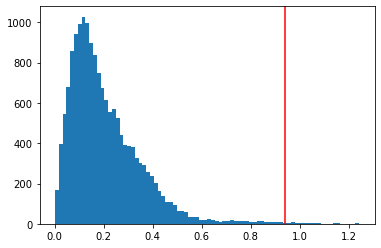

In [70]:
magnitud = np.sqrt((u)**2 + (v)**2)
M=np.max(magnitud)

np.std(u)
np.mean(v)
np.std(v)

#print(np.max(u))
#print(np.max(v))
print(np.max(M))

print(np.std(u))

n, b, _ = plt.hist(np.ravel(magnitud), bins=80)
plt.axvline(1.0, color='r')

## _Prueba con 10arcsec más a cada lado_

<class 'numpy.ndarray'>


(20, 139, 138)

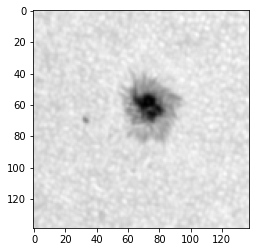

In [5]:
cubesectionmas = cube[:,135:274,136:274]
#cube = fits.getdata('/Volumes/VALERIA/AUSUS/Documents/MOAT/Cubos/cubo_filtered.fits')
#cube_filtered = ('/home/oan1803/Documents/MOAT/Cubos/cubo_filtered.fits')


#plt.imshow(cube[19,:,:], cmap='gray')
plt.imshow(cubesectionmas[19,:,:], cmap='gray')
print(type(cube))
cubesectionmas.shape

(139, 138)
56108.82387357613


(array([58]), array([50]))

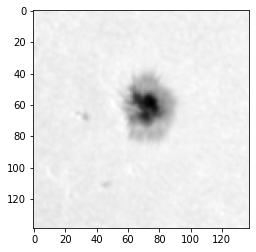

In [6]:
Promedio_cubesectionmas = np.mean(cubesectionmas[:19],axis=0)
print(Promedio_cubesectionmas.shape)

plt.imshow(Promedio_cubesectionmas, cmap='gray')

Promedio_cubesectionmas

minn=np.max(Promedio_cubesectionmas)

print(minn)

np.where(Promedio_cubesectionmas==minn)


In [7]:
velcubesectionmas = flowLCT(cubesectionmas[0:20], 3, 0.504, 720)
#velcube30 = flowLCT(cube[15:30], 2, 0.504, 720)
#velcube45 = flowLCT(cube[30:45], 2, 0.504, 720)
#velcube60 = flowLCT(cube[45:60], 2, 0.504, 720)
#velcube75 = flowLCT(cube[60:75], 2, 0.504, 720)


vx = velcubesectionmas.vx
vy = velcubesectionmas.vy
vz = velcubesectionmas.vz

print(np.min(vx))
print(np.mean(vx))
print(np.max(vx))

#print(vx)

-0.5147840224773572
2.222529670816704e-18
1.047708079945338


In [8]:
#Se crean las matrices para generar la red en la que se van a dibujar las flechas

x = np.arange(0,138)
y = np.arange(0,139)

ejex=x*0.504
ejey=y*0.504

X, Y = np.meshgrid(ejex, ejey)  #Matrices X y Y que van de 0 a 274 y de 0 a 275 en sus filas y columnas

u = vx.copy()  #Matrices que van a definir la dirección de la flecha, vx[0] son las vels de 0-30
v = vy.copy()

print(np.min(u))
print(np.max(u))

-0.5147840224773572
1.047708079945338


1.0930749354505984
0.1450429048994699
0.09763701895827001


0.08240750060071556

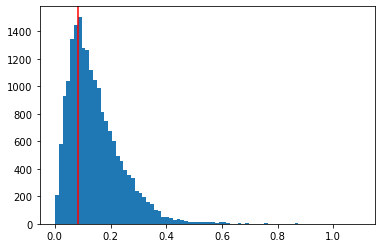

In [9]:
magnitud = np.sqrt((u)**2 + (v)**2)
# np.save('velocidadesSeccionMas', magnitud)

np.std(u)
np.mean(v)
np.std(v)

#print(np.max(u))
#print(np.max(v))
print(np.max(magnitud))
print(np.mean(magnitud))
print(np.std(magnitud))

n, b, _ = plt.hist(np.ravel(magnitud), bins=80)
plt.axvline(b[np.argmax(n)], color='r')
b[np.argmax(n)] #indice del máximo de la variable n

In [10]:
#Mascara para eliminar velocidades dentro de la mancha 

u[Promedio_cubesectionmas<50000]=np.nan
v[Promedio_cubesectionmas<50000]=np.nan

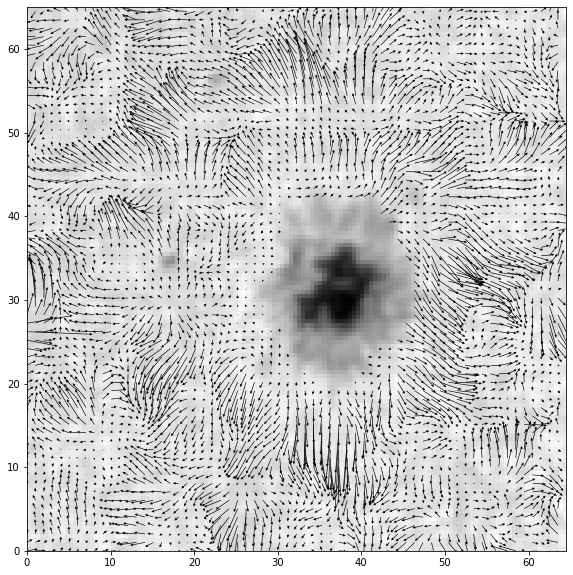

In [13]:
# Se hace la red de flechas de las velocidades 

#color = np.sqrt((u)**2 + (v)**2)

fig, ax = plt.subplots(figsize=(10,10))

Q= ax.quiver(X[0:129,0:128][::2,::2],Y[0:129,0:128][::2,::2],u[0:129,0:128][::2,::2],v[0:129,0:128][::2,::2], color='black', alpha=1, scale=8, headwidth= 4, headlength=4, width=0.0012)
plt.imshow(cubesectionmas[15,0:129,0:128],cmap='gray',origin='lower',extent=(0*0.504,128*0.504,0*0.504,129*0.504))


plt.savefig('SectionVelocity.pdf')
#SOLO SIRVE SIN LA MASCARA DE INTENSIDAD O CON LA MASCARA DE VELOCIDADES INTERNAS

# PRUEBA DE AJUSTE

In [107]:
vel = magnitud.copy()

vel = vel[np.where(vel<0.6)]

In [108]:
np.sqrt(vel.size)


138.30762813380903

In [124]:
n , b = np.histogram(vel.ravel(), bins = int(np.sqrt(vel.size)), density = True)

In [125]:
x = b[:-1]
y = n

In [141]:
from scipy.optimize import curve_fit
from scipy.stats import rayleigh,norm

In [126]:
def f1(x,a):
#def f1(x,a,b):
    #return rayleigh.pdf(x,loc=b, scale=a)
    dist = x/(a**2) * np.exp((-1)*(x**2)/(2*a**2))
    return dist

### loc=0 no hay valores menores a cero y empieza desde cero sin importar donde este el primer bin

In [127]:
init = [b[np.argmax(n)]]

bounds = ([b[np.argmax(n)]-np.std(vel)],[b[np.argmax(n)]+np.std(vel)]) #intervalo en el que oscila el factor de escala de Rayleigh


In [128]:
pars, pcov = curve_fit(f1,x,y,bounds=bounds,p0=init)  #algoritmo de ajuste de Rayleigh (pars: factor alpha, pcov: error)b

In [129]:
pars

array([0.1041448])

In [89]:
pars

array([0.10393571])

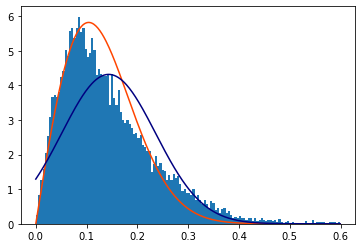

In [142]:
xline = np.linspace(0,np.max(vel),300)

pdf1 = rayleigh.pdf(xline, loc=0, scale=pars[0])
pdf2 = norm.pdf(xline, loc=np.mean(vel), scale=np.std(vel))
#pdf1 = f1(xline, pars[0])

n1, b1, _ = plt.hist(vel.ravel(), bins=int(np.sqrt(vel.size)), density=True)

plt.plot(xline, pdf1, 'orangered')
plt.plot(xline, pdf2, 'navy')

In [137]:
media= pars[0]*np.sqrt(np.pi/2)    #Valor de la velocidad media para Rayleigh
print(media) 
print(np.mean(vel))

0.13052615502577083
0.14339037308314836


In [140]:
print(np.std(vel))
desv = np.sqrt(pars[0]**2 * (4-np.pi)/2)
print(desv)

0.09231774930211749
0.06822904955324674


# --------------------- Cosas raras de ajustes

In [ ]:


import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    #pdf = pd.Series(y, x)

    return x,y #pdf

# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
data= vel.copy()

# Plot for comparison
#plt.figure(figsize=(12,8))
#ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
fig, ax = plt.subplots(1,1, figsize=(10,6))
n1, b1, _ = ax.hist(data.ravel(), bins=80, density=True) 

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'vel with best fit distribution \n' + dist_str)
ax.set_xlabel(u'vel (km/s)')
ax.set_ylabel('Frecuency')

# Make PDF with best params 
pdf_x, pdf_y = make_pdf(best_dist, best_fit_params)

# Display
#plt.figure(figsize=(12,8))
#ax = pdf.plot(lw=2, label='PDF', legend=True)
#data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)
fig, ax = plt.subplots(1,1, figsize=(10,6))
n1, b1, _ = ax.hist(data.ravel(), bins=80, density=True)
ax.plot(pdf_x,pdf_y)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'vel with best fit distribution \n' + dist_str)
ax.set_xlabel(u'vel (km/s)')
ax.set_ylabel('Frecuency')